# Metro Bike Share Program in LA: Impact Analysis

## by Thainá Venteu 

## Preliminary Wrangling

>Nowadays, bike sharing systems is a common service that we can find in big cities. These kinds of programs become popular due to the practicality it brings. The users can find the closest station to them, travel for any distance and return the bike in any other station. 
In addition to the practicality, three different types of bicycles are available for customers (standard, electic and smart) and different types of holder pass that can be chosen according to the user's needs.
This project aims to analyze the activities from Metro Bike Share Prgoram in the 2019 year for Los Angeles, California metropolitan area. The data are available on company site.  https://bikeshare.metro.net/about/data/) 


In [248]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

## Data gathering

In [249]:
df1 = pd.read_csv('metro-bike-share-trips-2019-q1.csv', sep = ',')
df1.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard
3,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard
4,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard


In [250]:
df2 = pd.read_csv('metro-bike-share-trips-2019-q2.csv', sep = ',')
df2.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,118571839,7,2019-04-01 00:02:00,2019-04-01 00:09:00,3069,34.050880,-118.248253,3034,34.042061,-118.263382,6459,1,One Way,Walk-up,standard
1,118574695,12,2019-04-01 00:56:00,2019-04-01 01:08:00,3031,34.044701,-118.252441,4311,34.059689,-118.294662,12229,30,One Way,Monthly Pass,standard
2,118575167,12,2019-04-01 01:06:00,2019-04-01 01:18:00,3038,34.046822,-118.248352,3082,34.046520,-118.237411,6422,1,One Way,Walk-up,standard
3,118577060,48,2019-04-01 01:08:00,2019-04-01 01:56:00,3068,34.053200,-118.250954,3005,34.048500,-118.258537,12211,30,One Way,Monthly Pass,standard
4,118575166,9,2019-04-01 01:09:00,2019-04-01 01:18:00,3038,34.046822,-118.248352,3082,34.046520,-118.237411,12005,1,One Way,Walk-up,standard


In [251]:
df3 = pd.read_csv('metro-bike-share-trips-2019-q3.csv', sep = ',')
df3.head()

C:\Users\Public\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard


In [252]:
df4 = pd.read_csv('metro-bike-share-trips-2019-q4.csv', sep = ',')
df4.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,130053086,25,2019-10-01 00:03:10,2019-10-01 00:28:40,3049,34.056969,-118.253593,3038,34.046822,-118.248352,16580,365,One Way,Annual Pass,electric
1,130053085,2,2019-10-01 00:07:43,2019-10-01 00:09:44,3067,34.045181,-118.250237,3029,34.048851,-118.246422,19587,30,One Way,Monthly Pass,electric
2,130053084,15,2019-10-01 00:17:30,2019-10-01 00:32:01,4420,34.168629,-118.377068,4416,34.157581,-118.388260,15625,30,One Way,Monthly Pass,smart
3,130053083,4,2019-10-01 00:18:20,2019-10-01 00:22:34,3031,34.044701,-118.252441,3006,34.045540,-118.256668,12450,365,One Way,Annual Pass,standard
4,130053082,20,2019-10-01 00:22:09,2019-10-01 00:42:53,3042,34.049301,-118.238808,4314,34.057709,-118.279762,17519,365,One Way,Annual Pass,electric


In [253]:
#structure of dataset
print(df1.shape, df2.shape, df3.shape, df4.shape)

(57358, 15) (64545, 15) (92124, 15) (76315, 15)


#### The dataset structure is shaped by four datase separated each four month

In [254]:
#attaching df1, df2, df3, df4
df = pd.concat([df1, df2, df3, df4])

In [255]:
#main features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290342 entries, 0 to 76314
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              290342 non-null  int64  
 1   duration             290342 non-null  int64  
 2   start_time           290342 non-null  object 
 3   end_time             290342 non-null  object 
 4   start_station        290342 non-null  int64  
 5   start_lat            285505 non-null  float64
 6   start_lon            285505 non-null  float64
 7   end_station          290342 non-null  int64  
 8   end_lat              279757 non-null  float64
 9   end_lon              279757 non-null  float64
 10  bike_id              290342 non-null  object 
 11  plan_duration        290342 non-null  int64  
 12  trip_route_category  290342 non-null  object 
 13  passholder_type      290342 non-null  object 
 14  bike_type            290342 non-null  object 
dtypes: float64(4), int

The study will be supported in the 'duration', 'start_time', 'end_time', 'passholder_type' and 'bike_type'. 

## Data assessing

In [256]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard
3,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard
4,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard


In [257]:
df.shape

(290342, 15)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290342 entries, 0 to 76314
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              290342 non-null  int64  
 1   duration             290342 non-null  int64  
 2   start_time           290342 non-null  object 
 3   end_time             290342 non-null  object 
 4   start_station        290342 non-null  int64  
 5   start_lat            285505 non-null  float64
 6   start_lon            285505 non-null  float64
 7   end_station          290342 non-null  int64  
 8   end_lat              279757 non-null  float64
 9   end_lon              279757 non-null  float64
 10  bike_id              290342 non-null  object 
 11  plan_duration        290342 non-null  int64  
 12  trip_route_category  290342 non-null  object 
 13  passholder_type      290342 non-null  object 
 14  bike_type            290342 non-null  object 
dtypes: float64(4), int

In [259]:
#Checking the all the duplicated lines
df.duplicated().sum()

0

There are not duplicated values.

In [260]:
df.isnull().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_station              0
start_lat               4837
start_lon               4837
end_station                0
end_lat                10585
end_lon                10585
bike_id                    0
plan_duration              0
trip_route_category        0
passholder_type            0
bike_type                  0
dtype: int64

##### There were null values for 'start_lat' and 'end_lat'. Maybe the connection was lost and we could not access the localization by GPS system. 

In [261]:
df['bike_type'].value_counts()

standard    154217
electric     96490
smart        39635
Name: bike_type, dtype: int64

There are three type of bike available . 

In [262]:
df['passholder_type'].value_counts()

Monthly Pass    172665
Walk-up          80854
Annual Pass      21659
One Day Pass     14731
Flex Pass          320
Testing            113
Name: passholder_type, dtype: int64

##### Apparently, there are six different types of pass holder. 

In [263]:
# According to the official website, the trips below 1 minute are removed from system. However, they were still present in the original dataset.
# Checking trips below 1 minute

trip_greater_one =  df.query('duration > 1')

##### In this dataset, there are not trips below 1 minute. 

Issues data 
- There are data separated by comma and separated by bars 
- There are not columns to indicate the year 
- There are not columns to indicate the month 
- There are not columns to indicate the weekday 

## Data cleaning 

#### Define

- Replace the '/' with '-' in the start_time column 
- Replace the '/' with '-' in the end_time column 
- Change the month to string labels
- Create the weekday column 
- Change the weekday values to weekday names

#### Code

In [264]:
#Replacing '/' with '-'
df['start_time'] = df['start_time'].str.replace('/', '-') 
df['end_time'] = df['end_time'].str.replace('/', '-') 

In [265]:
#Creating the 'year' column
df['year'] = pd.DatetimeIndex(df['start_time']).year

In [266]:
#Creating the 'month' column
df['month'] = pd.DatetimeIndex(df['start_time']).month

In [267]:
#Creating the 'day' column
df['day'] =  pd.DatetimeIndex(df['start_time']).day

In [268]:
#change the month to string labels
df['month'] = df['month'].replace(1, 'Jan')
df['month'] = df['month'].replace(2, 'Feb')
df['month'] = df['month'].replace(3, 'Mar')
df['month'] = df['month'].replace(4, 'Apr')
df['month'] = df['month'].replace(5, 'May')
df['month'] = df['month'].replace(6, 'June')
df['month'] = df['month'].replace(7, 'July')
df['month'] = df['month'].replace(8, 'Aug')
df['month'] = df['month'].replace(9, 'Sep')
df['month'] = df['month'].replace(10, 'Oct')
df['month'] = df['month'].replace(11, 'Nov')
df['month'] = df['month'].replace(12, 'Dec')

In [269]:
#Creating the 'weekday' column
df['start_time'] = pd.to_datetime(df['start_time'])
df['week_day'] = (df['start_time']).dt.weekday

In [270]:
#Rename the weekdays values 
df['week_day'] = df['week_day'].replace(0, 'Mon')
df['week_day'] = df['week_day'].replace(1, 'Tue')
df['week_day'] = df['week_day'].replace(2, 'Wed')
df['week_day'] = df['week_day'].replace(3, 'Thu')
df['week_day'] = df['week_day'].replace(4, 'Fri')
df['week_day'] = df['week_day'].replace(5, 'Sat')
df['week_day'] = df['week_day'].replace(6, 'Sun')

#### Test

In [271]:
#checking the news columns with data 
df.head(3)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,year,month,day,week_day
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard,2019,Jan,1,Tue
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard,2019,Jan,1,Tue
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard,2019,Jan,1,Tue


In [272]:
# Checking the replacing process: '/' with '-'
df.query('trip_id == "124657107"')

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,year,month,day,week_day
0,124657107,5,2019-07-01 00:04:00,7-1-2019 0:09,4312,34.06699,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard,2019,July,1,Mon


In [273]:
# Checking the month names
df['month'].value_counts()

Aug     32843
Sep     30781
Oct     30179
July    28500
June    26881
Nov     24034
Dec     22102
Mar     20922
Jan     19471
May     18922
Apr     18742
Feb     16965
Name: month, dtype: int64

In [274]:
# Checking the weekday names
df['week_day'].value_counts()

Fri    45486
Tue    45249
Thu    43829
Wed    41854
Mon    41831
Sun    36354
Sat    35739
Name: week_day, dtype: int64

## Data analysis

This section aims to answer questions such as those questions listed below:

- What is the estimated number of bikes available for trips in Los Angeles?
- How many stations are there in Los Angeles according to the dataframe?
- What is the duration average of a trip made by bike users in Los Angeles?
- What are the duration averages of a trip by different type of users?
- What is the favorite ticket type among users?
- What is the favorite bike type among the most frequent users?
- What is the day of the week with more tip?
- What month of the year do the trips increase?
- How is the distribution of the trips for month?

In [275]:
#number of bikes available
df['bike_id'].nunique()

5094

In [276]:
#number of station available
station = (df['start_station'] + df['end_station']).nunique()
station

1049

In [277]:
#trip average duration
df['duration'].mean()

31.080797817745967

In [278]:
# favorite type of ticket among different users type
df['passholder_type'].value_counts()

Monthly Pass    172665
Walk-up          80854
Annual Pass      21659
One Day Pass     14731
Flex Pass          320
Testing            113
Name: passholder_type, dtype: int64

In [279]:
#duration of a trip by Monthly Pass
df.query('passholder_type == "Monthly Pass"')['duration'].mean()

14.978768134827556

In [280]:
#duration of a trip by Walk-up
df.query('passholder_type == "Walk-up"')['duration'].mean()

62.38157666905781

In [281]:
#duration of a trip by Annual Pass
df.query('passholder_type == "Annual Pass"')['duration'].mean()

15.677316588946859

In [282]:
#duration of a trip by One Day Pass
df.query('passholder_type == "One Day Pass"')['duration'].mean()

70.8218722422103

In [283]:
#duration of a trip by Flex Pass 
df.query('passholder_type == "Flex Pass"')['duration'].mean()

24.340625

In [284]:
#duration of a trip by Testing
df.query('passholder_type == "Testing"')['duration'].mean()

29.47787610619469

##### It seems that people who use the bike system for longer trip durations prefer the One Day Pass system. 

In [285]:
#favorite bike type 

df['bike_type'].value_counts()

standard    154217
electric     96490
smart        39635
Name: bike_type, dtype: int64

In [286]:
monthly_pass = df.query('passholder_type == "Monthly Pass"')
walk_up = df.query('passholder_type == "Walk-up"')
annual_pass = df.query('passholder_type == "Annual Pass"')
one_day = df.query('passholder_type == "One Day Pass"')
flex_pass = df.query('passholder_type == "Flex Pass"')
test = df.query('passholder_type == "Testing"')

In [287]:
#favorite type - monthly pass 
monthly_pass['bike_type'].value_counts()

standard    86735
electric    75399
smart       10531
Name: bike_type, dtype: int64

In [288]:
#favorite type - walk up 
walk_up['bike_type'].value_counts()

standard    48271
smart       21439
electric    11144
Name: bike_type, dtype: int64

In [289]:
#favorite type - annual pass 
annual_pass['bike_type'].value_counts()

standard    13091
electric     7510
smart        1058
Name: bike_type, dtype: int64

In [290]:
#favorite type - one day pass 
one_day['bike_type'].value_counts()

smart       6490
standard    5807
electric    2434
Name: bike_type, dtype: int64

In [291]:
#favorite type - flex pass 
flex_pass['bike_type'].value_counts()

standard    312
smart         5
electric      3
Name: bike_type, dtype: int64

In [292]:
#favorite type - testing
test['bike_type'].value_counts()

smart       112
standard      1
Name: bike_type, dtype: int64

In [293]:
monthly_pass.shape


(172665, 19)

In [294]:
walk_up.shape

(80854, 19)

In [295]:
annual_pass.shape

(21659, 19)

In [296]:
one_day.shape

(14731, 19)

In [297]:
flex_pass.shape

(320, 19)

In [298]:
test.shape

(113, 19)

##### People who use the monthly pass are the most frequent users of bikeshare metro. Apparently, they prefer the standard bike.

In [299]:
df.head(1)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,year,month,day,week_day
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard,2019,Jan,1,Tue


In [300]:
# weekday with more trips 
df['week_day'].value_counts()

Fri    45486
Tue    45249
Thu    43829
Wed    41854
Mon    41831
Sun    36354
Sat    35739
Name: week_day, dtype: int64

##### The day of the week with more trips is Friday. However, there is just a few difference between the others weekdays (Tuesday, Thursday, Wednesday and Monday). These number could indicate that bikes are common used by people to go to their jobs.   


In [301]:
df['month'].value_counts()

Aug     32843
Sep     30781
Oct     30179
July    28500
June    26881
Nov     24034
Dec     22102
Mar     20922
Jan     19471
May     18922
Apr     18742
Feb     16965
Name: month, dtype: int64

# Visualizations

In [302]:
base_color = sb.color_palette("rocket_r")
base_color2 = base_color2 = sb.color_palette()[0]

## Univariate Exploration

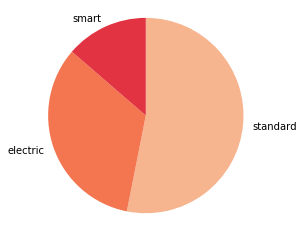

In [303]:
# favorite bike types of users - Bike share metro 
biketype_counts = df['bike_type'].value_counts()
plt.pie(biketype_counts, colors = base_color, labels = biketype_counts.index, startangle = 90, counterclock = False)
plt.axis('square');

The favorite bike type is the standard one. 

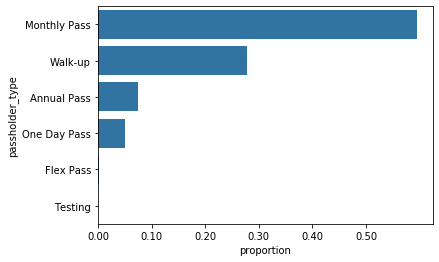

In [304]:
# favorite pass types of users - Bike share metro

maxpass = pass_holder_type[0]
npass_type = df['passholder_type'].value_counts().sum()
npass_type
max_prop = maxpass/npass_type
 
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

passholder_order = df['passholder_type'].value_counts().index
pass_holder_type = df['passholder_type'].value_counts()
type_p = df['passholder_type']

sb.countplot(data = df, y = 'passholder_type', color = base_color2, order = passholder_order);

plt.xticks(tick_props * npass_type, tick_names)
plt.xlabel('proportion');

There are more poeple using monthly passholder in the Bike share metro system. 

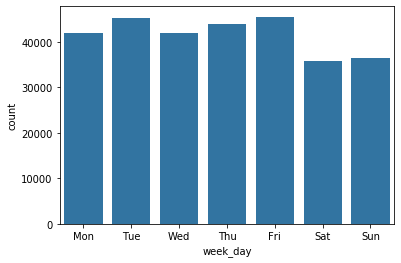

In [305]:
# Trips for weekday
sb.countplot(data = df, x = 'week_day', color = base_color2, order = ['Mon', 'Tue', 'Wed', 'Thu','Fri', 'Sat', 'Sun']);

As we observed before, the are more trip during the week. 

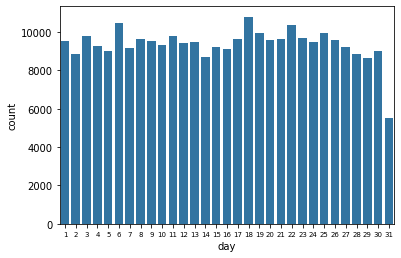

In [306]:
# Trips for day
sb.countplot(data = df, x = 'day', color = base_color2)
plt.xticks(fontsize=7);

The worst day of bike acitivity is the last day of the month.

## Bivariate Exploration

Text(0.5, 0, 'Trip duration (minutes)')

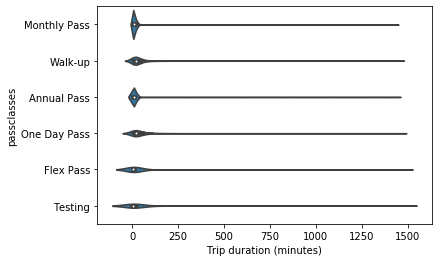

In [307]:
# Plot Pass holder type x Trip Duration 
passtype_classes = ['Monthly Pass', 'Walk-up', 'Annual Pass', 'One Day Pass', 'Flex Pass','Testing']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=passtype_classes)
df['passclasses'] = df['passholder_type'].astype(vclasses);
sb.violinplot(data=df, x='duration', y='passclasses', color = base_color2);
plt.xlabel('Trip duration (minutes)')


## Multivariate analysis

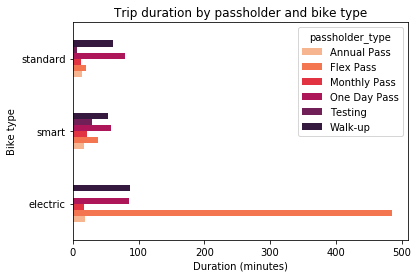

In [308]:
average_duration_by_city_and_subscription_type = df.groupby(['bike_type','passholder_type'])['duration'].mean().unstack()
average_duration_by_city_and_subscription_type.plot(kind='barh', color = base_color)

plt.title('Trip duration by passholder and bike type')
plt.ylabel('Bike type')
plt.xlabel('Duration (minutes)')
plt.show()


In [309]:
df.to_csv('bike_df.csv')